In [39]:
#import neccssary libraries
import numpy as np
import pandas as pd
import seaborn as sns



In [40]:
#load the house price datasets
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### Feature Selection

In [42]:
# Drop unwanted columns: area_type, availability, society, balcony
df = df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

In [43]:
#Handle missing value in Location Columnd
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [44]:
#handling missing value inside the Location column
df['location'].value_counts() # count of houses in whitefiled and sarjapur Road a re more
df['location']=df['location'].fillna('Sarjapur Road')
df['location'].value_counts()

location
Whitefield                                      540
Sarjapur  Road                                  399
Electronic City                                 302
Kanakpura Road                                  273
Thanisandra                                     234
                                               ... 
Maragondana Halli, kr puram, old madras road      1
Chikkajala                                        1
Udayagiri                                         1
pavitra paradise                                  1
Chikbasavanapura                                  1
Name: count, Length: 1306, dtype: int64

In [45]:
#Handling missing value in size column
#Handle missing values in size column
df[df["size"].isnull()]
df["size"].value_counts() #most of the values are in 2bhk replace with 2bhk
df["size"] = df["size"].fillna("2 BHK")
df["size"].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [46]:
#handling missing values in bath column
#it is in float datatype
#so going with mean or median
df[df["bath"].isnull()]

med_bath = df["bath"].median()
med_bath

df["bath"] = df["bath"].fillna(med_bath)

df["bath"] =df["bath"].astype(int) #converting float to int
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5,120.00
2,Uttarahalli,3 BHK,1440,2,62.00
3,Lingadheeranahalli,3 BHK,1521,3,95.00
4,Kothanur,2 BHK,1200,2,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4,231.00
13316,Richards Town,4 BHK,3600,5,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2,60.00
13318,Padmanabhanagar,4 BHK,4689,4,488.00


In [47]:
#Drop duplicate rows
df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12438 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12438 non-null  int64  
 4   price       12438 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 583.0+ KB


In [48]:
df['location'].value_counts()

location
Whitefield                   507
Sarjapur  Road               364
Electronic City              273
Thanisandra                  224
Kanakpura Road               223
                            ... 
Udayagiri                      1
pavitra paradise               1
kadubisnahalli                 1
Chuchangatta Colony            1
Electronic City Phase 1,       1
Name: count, Length: 1306, dtype: int64

In [49]:
#Handling location column
df['location']=df['location'].apply(lambda x: x.strip())

In [50]:
df['location'].value_counts()

location
Whitefield                         508
Sarjapur  Road                     364
Electronic City                    275
Thanisandra                        226
Kanakpura Road                     223
                                  ... 
Ramanagara Channapatna               1
Gulakamale                           1
3rd Stage Raja Rajeshwari Nagar      1
Duddanahalli                         1
Doddanakunte                         1
Name: count, Length: 1295, dtype: int64

<Axes: xlabel='location', ylabel='count'>

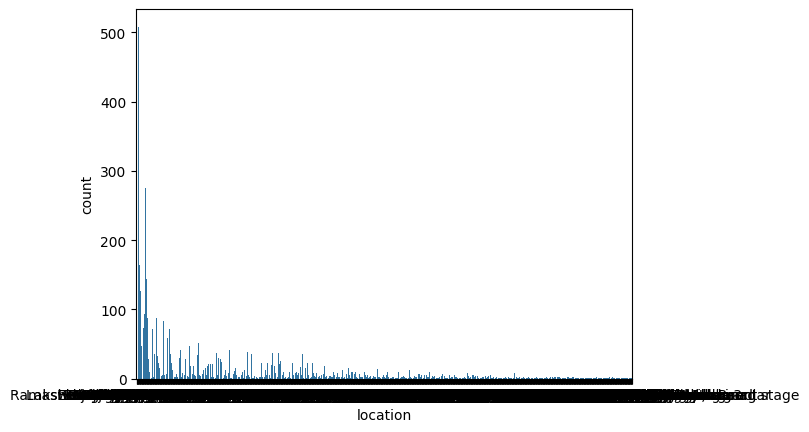

In [51]:
sns.countplot(x='location',data=df)

In [52]:
loc=df['location'].value_counts()
loc_less_than_10=loc[loc<=10]
df['location']=df['location'].apply(lambda x:'other' if x in loc_less_than_10 else x)
df['location'].value_counts()

location
other                   2928
Whitefield               508
Sarjapur  Road           364
Electronic City          275
Thanisandra              226
                        ... 
Tindlu                    11
Banashankari Stage V      11
Doddakallasandra          11
Thyagaraja Nagar          11
HAL 2nd Stage             11
Name: count, Length: 232, dtype: int64

In [53]:
out=[int(i.split()[0]) for i in df['size']]
df['bhk']=out
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5,120.00,4
2,Uttarahalli,3 BHK,1440,2,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3,95.00,3
4,Kothanur,2 BHK,1200,2,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3,112.00,3
13315,Whitefield,5 Bedroom,3453,4,231.00,5
13316,other,4 BHK,3600,5,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2,60.00,2


In [54]:
#Handling total_sqft column
def clean_sqft(sqft):     
    l = sqft.split("-")
    if len(l)==2:
        return float(l[0])+float(l[1])/2
    try:
       return float(l[0]) 
    except:
        return None

    
df["total_sqft"] = df["total_sqft"].apply(clean_sqft)

df["total_sqft"] = df["total_sqft"].fillna(round(df["total_sqft"].mean()))

In [55]:
#create price_per_sqft
# formula:   price/total_sqft
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


In [56]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12438.000000,12438.000000,12438.000000,12438.000000,1.243800e+04
mean,1589.759552,2.715549,115.408159,2.826821,8.077937e+03
std,1288.184379,1.367021,153.069125,1.323065,1.099456e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.271357e+03
50%,1296.000000,2.000000,74.000000,3.000000,5.485678e+03
75%,1700.000000,3.000000,125.000000,3.000000,7.439638e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


<Axes: xlabel='total_sqft'>

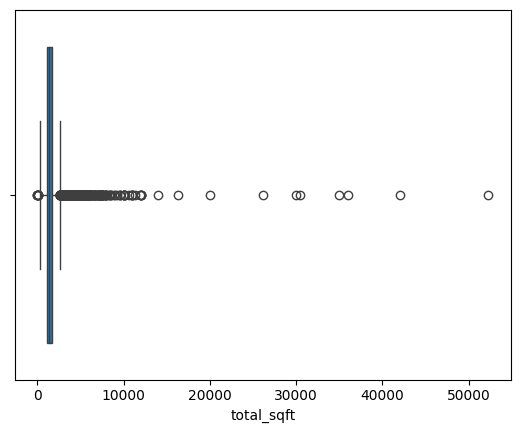

In [57]:
sns.boxplot(x='total_sqft',data=df)

In [58]:
# total_sqft/bhk>=30
# df[df['total_sqft'<300]]

df=df[df['bhk']<=6]

In [59]:
#I  total_sqft column we have some roo, with less than 300 sqft those are outliers

In [60]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


In [61]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12170.000000,12170.000000,12170.000000,12170.000000,1.217000e+04
mean,1571.412926,2.604930,112.460369,2.705259,7.787965e+03
std,1211.235105,1.058193,145.591616,0.962087,1.091826e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.257417e+03
50%,1295.000000,2.000000,72.000000,3.000000,5.447412e+03
75%,1698.000000,3.000000,120.000000,3.000000,7.310441e+03
max,52272.000000,9.000000,2912.000000,6.000000,1.200000e+07


In [62]:


df[df['bath']<df['bath']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136


<Axes: xlabel='price_per_sqft'>

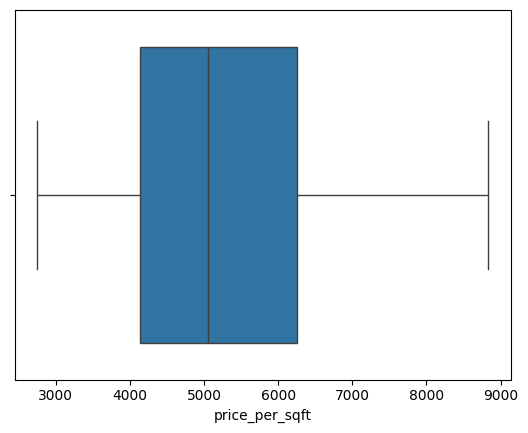

In [63]:
#Handling outliers in price per sqft
# sns.boxplot(x="price_per_sqft",data=df)
#IQR Method --> 
q1 = df["price_per_sqft"].quantile(0.25)
q3 = df["price_per_sqft"].quantile(0.75)

IQR = q3-q1

lower = q1-0.5*IQR
upper = q3+0.5*IQR

df = df[(df["price_per_sqft"]>=lower) & (df["price_per_sqft"]<=upper)]
sns.boxplot(x="price_per_sqft",data=df)

In [64]:
df.reset_index(inplace=True)
df = df.drop(["index","size","price_per_sqft"],axis=1)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
9944,Rachenahalli,1050.0,2,52.71,2
9945,Bellandur,1262.0,2,47.00,2
9946,Green Glen Layout,1715.0,3,112.00,3
9947,Whitefield,3453.0,4,231.00,5


In [65]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error

In [66]:
encoder = LabelEncoder()
df["encoded_loc"] = encoder.fit_transform(df["location"])
df.head()

,location,total_sqft,bath,price,bhk,encoded_loc
0,Electronic City Phase II,1056.0,2,39.07,2,75
1,Chikka Tirupathi,2600.0,5,120.00,4,57
2,Uttarahalli,1440.0,2,62.00,3,216
3,Lingadheeranahalli,1521.0,3,95.00,3,154
4,Kothanur,1200.0,2,51.00,2,146


In [67]:
#Divide into input and Output
X = df.drop(["location","price"],axis=1)
y = df.price

In [68]:
#split the data into training and testing data
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [69]:
#model training 
model = RandomForestRegressor(random_state=42)
params = {
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6,7]
}

grid = GridSearchCV(estimator=model,param_grid=params,cv=5)

grid.fit(Xtrain,ytrain)

print("Best params: ",grid.best_params_)
print("Best Score: ",grid.best_score_)

Best params:  {'max_depth': 7, 'n_estimators': 300}
Best Score:  0.8322839310360033


In [71]:
ypred = grid.predict(Xtest)
ypred

array([121.16730322,  52.25533055,  68.90823134, ...,  52.56904112,
       105.8784275 ,  61.11069133], shape=(2985,))

In [72]:
print("Training Eff: ",grid.score(Xtrain,ytrain))
print("Testing Eff: ",grid.score(Xtest,ytest))

Training Eff:  0.8927070710305304
Testing Eff:  0.8161615606423338


In [73]:
print("R2: ",r2_score(ytest,ypred))
print("MAE: ",mean_absolute_error(ytest,ypred))

R2:  0.8161615606423338
MAE:  15.813179306393634


In [74]:
#Save cleaned dataset
df.to_csv("cleaned_df.csv")

In [75]:
#Save the model in pickle file
import pickle
with open("RF_model.pkl","wb") as file:
    pickle.dump(grid,file)